### Decision trees

performs both classification, regression, and multiouput tasks. Fundatmental components of random forests

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

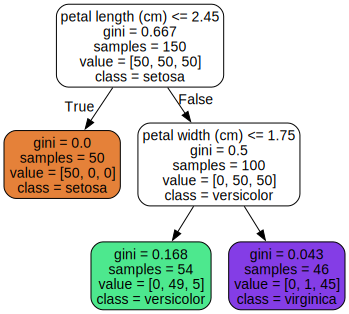

In [3]:
from graphviz import Source

Source.from_file("iris_tree.dot")

Gini impurity equal to 1 – (0/54)^2 – (49/54)^2 – (5/54)^2 ≈ 0.168

In [4]:
tree_clf.predict_proba([[5, 1.5]]).round(3) # petals are 5cm long 1.5 wide

array([[0.   , 0.907, 0.093]])

In [5]:
tree_clf.predict([[5, 1.5]])

array([1])

### CART classification and Regression Tree to train decision trees

splits the training set into two subsets using a single feature then so on recursively. Stops once it reaches the maximum depth. A greedy algorithm often produces a solution that’s
reasonably good but not guaranteed to be optimal

The concept of entropy originated in thermodynamics as
a measure of molecular disorder: entropy approaches zero when molecules are still
and well ordered.

has an entropy equal to –(49/54) log2 (49/54) – (5/54) log2 (5/54) ≈ 0.445.

Using Gini impurity or entropy doesn't matter, Gini isolates most frequent class in its own branch and entropy produces more balanced trees

To avoid overfitting the training data, restrict the decision tree’s freedom
during training, this is called regularization. Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize the model.

In [13]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

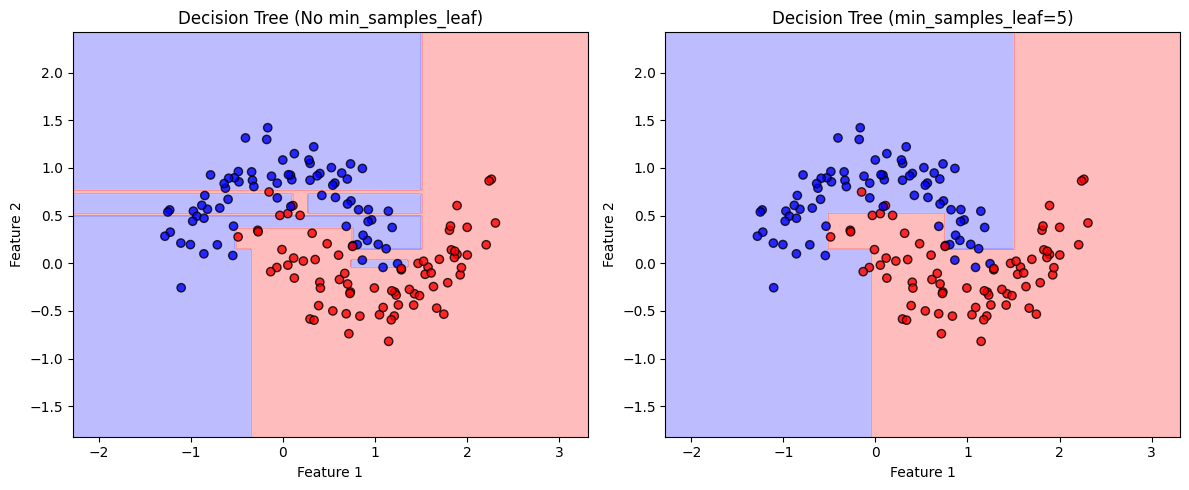

In [14]:
# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, ax, title):
    # Create a grid of points
    x1s = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300)
    x2s = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_grid = np.c_[x1.ravel(), x2.ravel()]
    
    # Predict for each point in the grid
    y_pred = clf.predict(X_grid).reshape(x1.shape)
    
    # Plot the decision boundary
    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap=plt.cm.bwr)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.bwr, alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot tree_clf1
plot_decision_boundary(tree_clf1, X_moons, y_moons, axes[0], "Decision Tree (No min_samples_leaf)")

# Plot tree_clf2
plot_decision_boundary(tree_clf2, X_moons, y_moons, axes[1], "Decision Tree (min_samples_leaf=5)")

plt.tight_layout()
plt.show()

In [15]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [16]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

### Decision trees are also capable of performing regression tasks

In [18]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

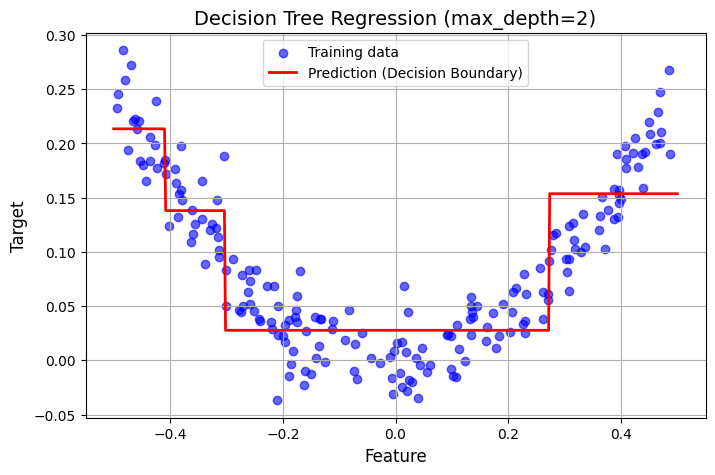

In [20]:
# Create a grid of values for visualization
X_grid = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred = tree_reg.predict(X_grid)

# Plot the data and the decision boundary
plt.figure(figsize=(8, 5))
plt.scatter(X_quad, y_quad, color="blue", label="Training data", alpha=0.6)
plt.plot(X_grid, y_pred, color="red", label="Prediction (Decision Boundary)", linewidth=2)
plt.title("Decision Tree Regression (max_depth=2)", fontsize=14)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Target", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

instead of trying to split the training set in a way that minimizes impurity, it now tries to split the training set in a way that minimizes the MSE. 

Decision Trees love data thas orthogonal (all splits are perpendicular to an axis)

One way to limit this problem is to scale the data then apply a principal component analysis transformation (PCA) it rotates data in a way that reduces correlation between the features.

In [23]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

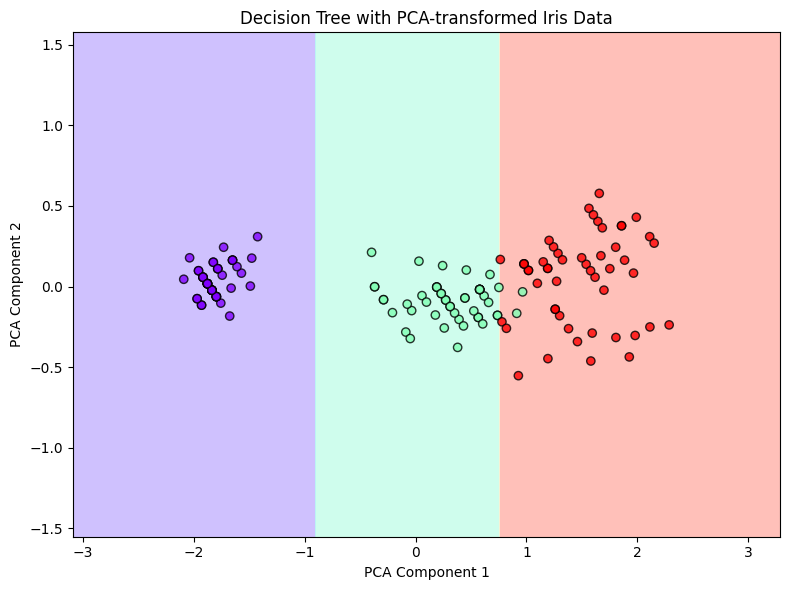

In [24]:
# Function to plot decision boundaries for PCA-transformed data
def plot_pca_decision_boundary(clf, X, y, ax, title):
    x1s = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300)
    x2s = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_grid = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_grid).reshape(x1.shape)

    # Plot decision boundaries
    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap=plt.cm.rainbow)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.rainbow, alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_pca_decision_boundary(tree_clf_pca, X_iris_rotated, y_iris, ax, "Decision Tree with PCA-transformed Iris Data")
plt.tight_layout()
plt.show()

The main issue with decision trees is that they have quite a high variance: small changes to the hyperparameters or to the data may produce very different models. 

By averaging predictions over many trees, it’s possible to reduce variance significantly. Such an ensemble of trees is called a random forest.